In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
from sklearn import linear_model
%matplotlib inline
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('data.csv')

In [3]:
data.head(15)

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M
5,F,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,42,30,13,70,Yes,Bad,Above-7,M
6,M,KW,KuwaIT,MiddleSchool,G-07,A,Math,F,Father,35,12,0,17,No,Bad,Above-7,L
7,M,KW,KuwaIT,MiddleSchool,G-07,A,Math,F,Father,50,10,15,22,Yes,Good,Under-7,M
8,F,KW,KuwaIT,MiddleSchool,G-07,A,Math,F,Father,12,21,16,50,Yes,Good,Under-7,M
9,F,KW,KuwaIT,MiddleSchool,G-07,B,IT,F,Father,70,80,25,70,Yes,Good,Under-7,M


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 non-null    object
 14  ParentschoolSatisfaction  

In [5]:
data.nunique()

gender                       2
NationalITy                 14
PlaceofBirth                14
StageID                      3
GradeID                     10
SectionID                    3
Topic                       12
Semester                     2
Relation                     2
raisedhands                 82
VisITedResources            89
AnnouncementsView           88
Discussion                  90
ParentAnsweringSurvey        2
ParentschoolSatisfaction     2
StudentAbsenceDays           2
Class                        3
dtype: int64

In [6]:
data.gender.unique()

array(['M', 'F'], dtype=object)

In [7]:
data["gender"] = data.gender.replace({'M':0, "F":1})

In [8]:
data.gender.unique()

array([0, 1], dtype=int64)

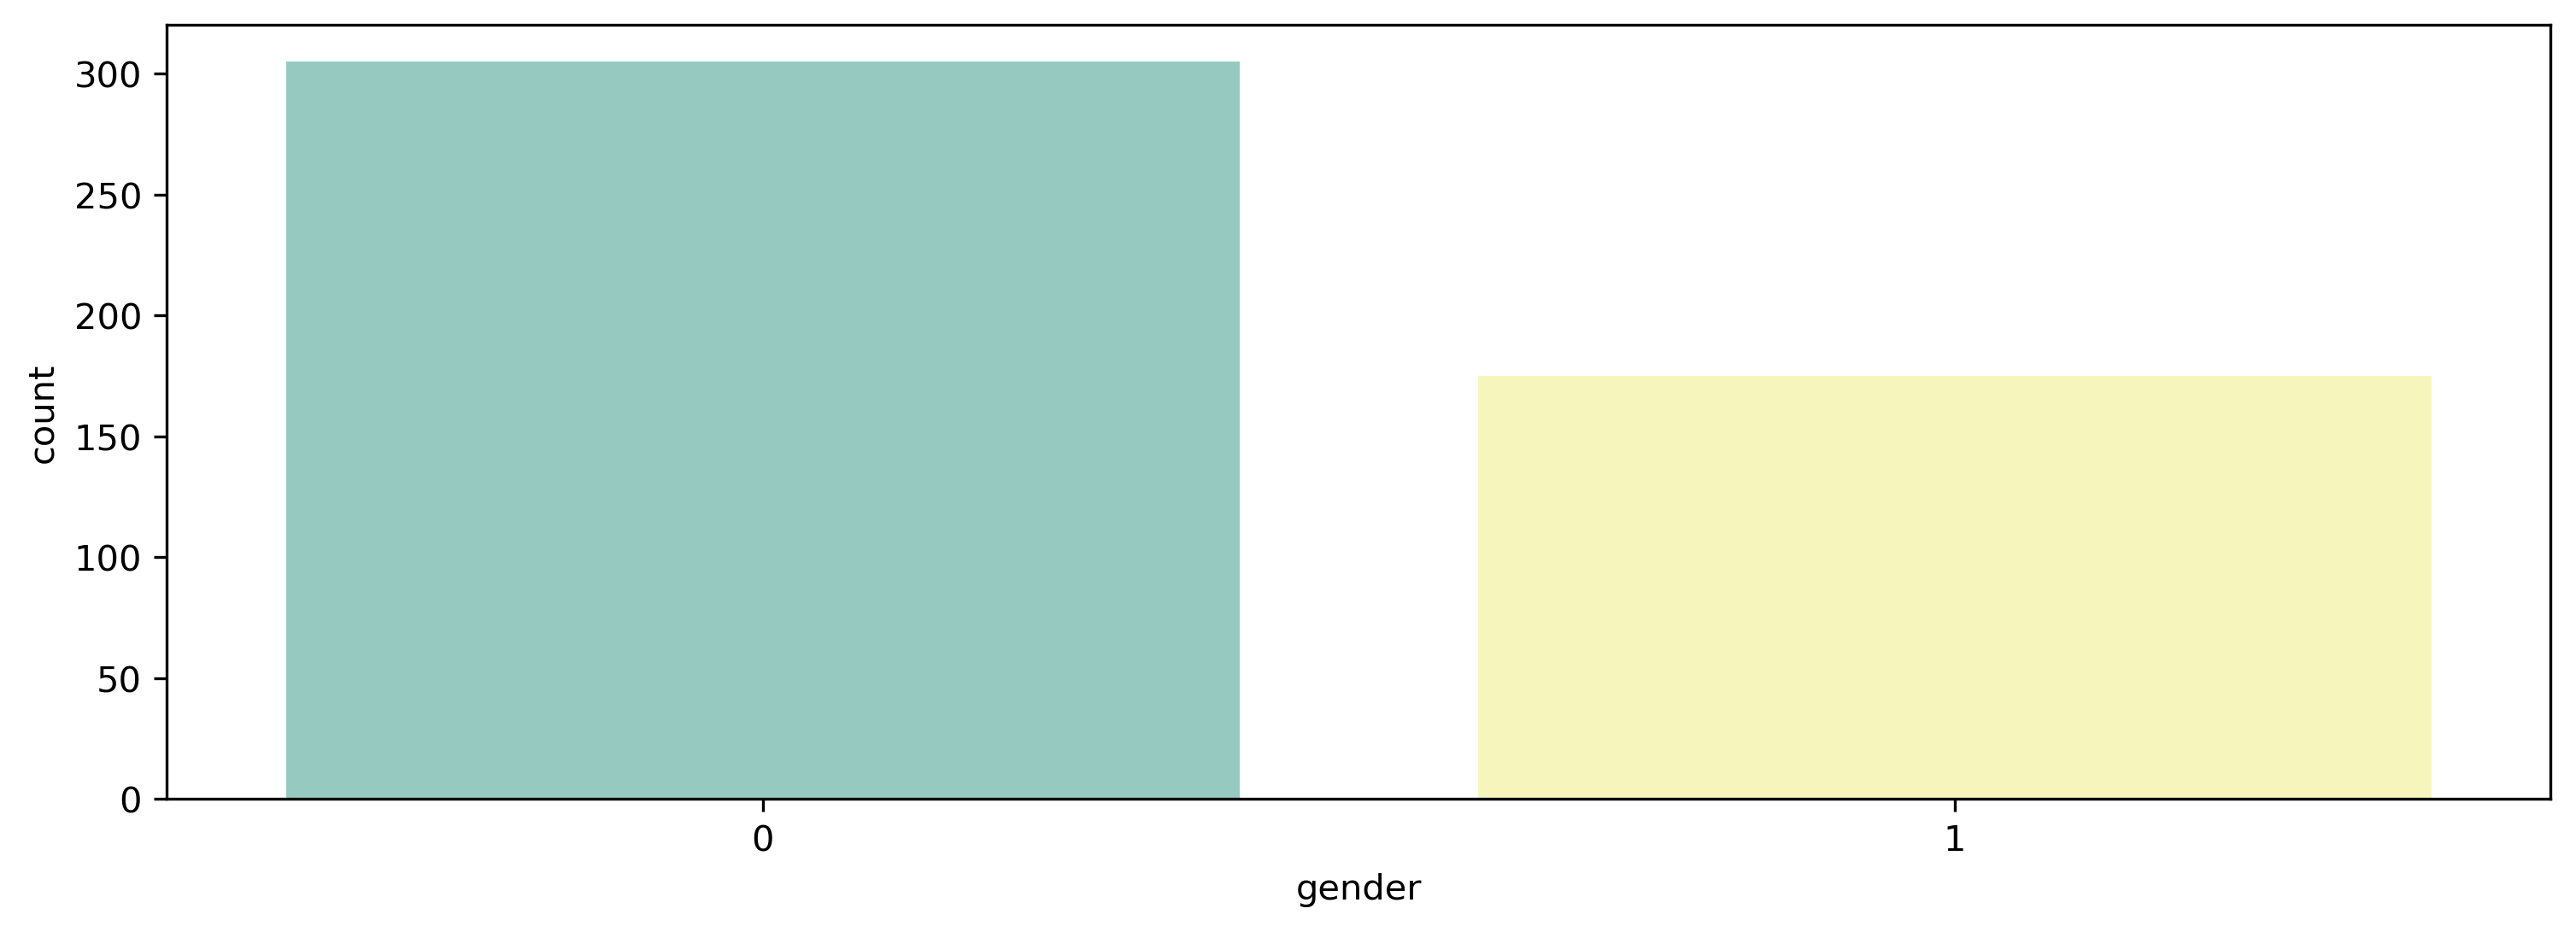

In [9]:
plt.figure(figsize=(12,4), dpi = 300)
sns.countplot(x = 'gender', data = data, palette="Set3")
plt.xticks(rotation = 0)
plt.show()

#### There are more male students than female students.

In [10]:
data.NationalITy.unique()

array(['KW', 'lebanon', 'Egypt', 'SaudiArabia', 'USA', 'Jordan',
       'venzuela', 'Iran', 'Tunis', 'Morocco', 'Syria', 'Palestine',
       'Iraq', 'Lybia'], dtype=object)

In [11]:
data['NationalITy'].value_counts()

KW             179
Jordan         172
Palestine       28
Iraq            22
lebanon         17
Tunis           12
SaudiArabia     11
Egypt            9
Syria            7
Lybia            6
Iran             6
USA              6
Morocco          4
venzuela         1
Name: NationalITy, dtype: int64

In [12]:
data["NationalITy"] = data.NationalITy.replace({'KW':1, "lebanon":2,'Egypt':3, "SaudiArabia":4,'USA':5, 
                                                "Jordan":6,'venzuela':7, "Iran":8,
                                               'Tunis':9, "Morocco":10,'Syria':11, "Palestine":12,'Iraq':13, "Lybia":14,})

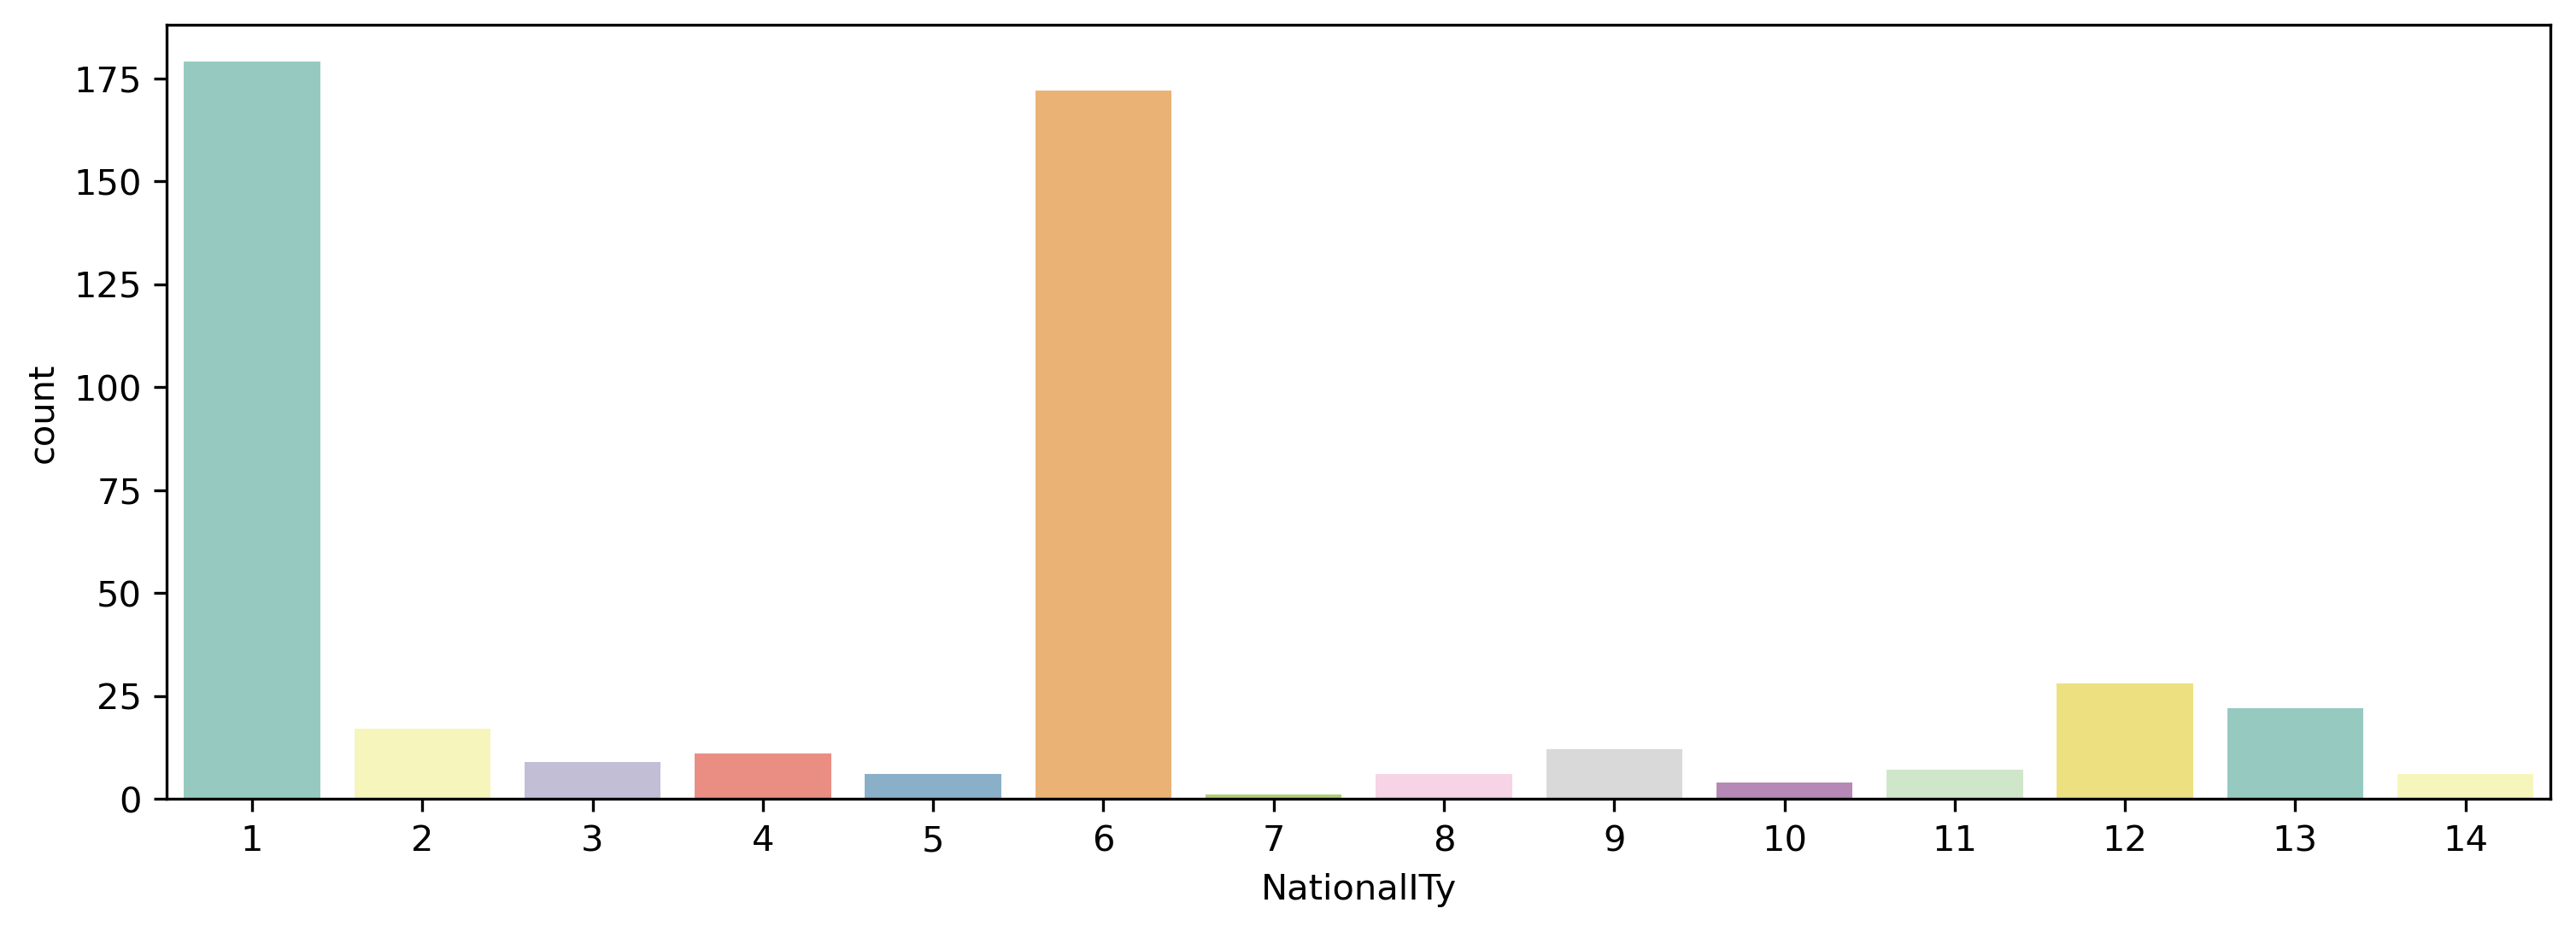

In [13]:
plt.figure(figsize=(12,4), dpi = 300)
sns.countplot(x = 'NationalITy', data = data, palette="Set3")
plt.xticks(rotation = 0)
plt.show()

#### Most students are from Kuwait, followed by Jordan.

In [14]:
data.PlaceofBirth.unique()

array(['KuwaIT', 'lebanon', 'Egypt', 'SaudiArabia', 'USA', 'Jordan',
       'venzuela', 'Iran', 'Tunis', 'Morocco', 'Syria', 'Iraq',
       'Palestine', 'Lybia'], dtype=object)

In [15]:
data['PlaceofBirth'].value_counts()

KuwaIT         180
Jordan         176
Iraq            22
lebanon         19
SaudiArabia     16
USA             16
Palestine       10
Egypt            9
Tunis            9
Lybia            6
Iran             6
Syria            6
Morocco          4
venzuela         1
Name: PlaceofBirth, dtype: int64

In [16]:
data["PlaceofBirth"] = data.NationalITy.replace({'KuwaIT':1, "lebanon":2,'Egypt':3, "SaudiArabia":4,'USA':5, 
                                                "Jordan":6,'venzuela':7, "Iran":8,
                                               'Tunis':9, "Morocco":10,'Syria':11, "Palestine":12,'Iraq':13, "Lybia":14,})

In [17]:
data.StageID.unique()

array(['lowerlevel', 'MiddleSchool', 'HighSchool'], dtype=object)

#### StageID: Educational Stages- educational level student belongs

In [18]:
data["StageID"] = data.StageID.replace({'lowerlevel':1, "MiddleSchool":2,"HighSchool":3})

In [19]:
data.GradeID.unique()

array(['G-04', 'G-07', 'G-08', 'G-06', 'G-05', 'G-09', 'G-12', 'G-11',
       'G-10', 'G-02'], dtype=object)

#### Grade Levels- grade student belongs

In [20]:
data["GradeID"] = data.StageID.replace({'G-04':4, "G-05":5,"G-06":6,'G-07':7, "G-08":8,"G-09":9,'G-10':10, "G-11":11,"G-12":12})

In [21]:
data.SectionID.unique()

array(['A', 'B', 'C'], dtype=object)

#### Section ID- classroom student belongs

In [22]:
data["SectionID"] = data.SectionID.replace({'A':1, "B":2, "C":3})

In [23]:
data.Topic.unique()

array(['IT', 'Math', 'Arabic', 'Science', 'English', 'Quran', 'Spanish',
       'French', 'History', 'Biology', 'Chemistry', 'Geology'],
      dtype=object)

In [24]:
data["Topic"] = data.Topic.replace({'IT':1, "Math":2 , "Arabic":3, 'Science':4, "English":5, "Quran":6,'Spanish':7, "French":8 , "History":9, 'Biology':10, "Chemistry":11, "Geology":12 })

In [25]:
data.Semester.unique()

array(['F', 'S'], dtype=object)

In [26]:
data["SectionID"] = data.SectionID.replace({'F':1, "S":2})

In [27]:
data.Relation.unique()

array(['Father', 'Mum'], dtype=object)

#### Relation: Parent responsible for student

In [28]:
data["Relation"] = data.Relation.replace({'Father':1, "Mum":2})

In [29]:
data.raisedhands.unique()

array([ 15,  20,  10,  30,  40,  42,  35,  50,  12,  70,  19,   5,  62,
        36,  55,  69,  60,   2,   0,   8,  25,  75,   4,  45,  14,  33,
         7,  13,  29,  39,  49,  16,  28,  27,  21,  80,  17,  65,  22,
        11,   1,   3, 100,   6,  90,  77,  24,  66,  23,  82,  72,  51,
        85,  87,  95,  81,  53,  92,  83,  67,  96,  57,  73,   9,  32,
        52,  59,  61,  79,  18,  74,  97,  41,  71,  98,  78,  89,  88,
        86,  76,  99,  84], dtype=int64)

In [30]:
data.VisITedResources.unique()

array([16, 20,  7, 25, 50, 30, 12, 10, 21, 80, 88,  6,  1, 14, 70, 40, 13,
       15, 60,  0,  2, 19, 85, 90,  5, 22, 11, 54, 35, 33,  4, 39, 75, 69,
        3,  8, 89, 44, 92, 26, 27, 29, 98,  9, 42, 65, 79, 55, 63, 91, 51,
       58, 68, 82, 72, 52, 62, 71, 66, 43, 95, 31, 41, 81, 61, 83, 84, 17,
       94, 48, 86, 74, 76, 97, 87, 99, 34, 64, 28, 38, 36, 24, 59, 57, 77,
       18, 93, 96, 78], dtype=int64)

#### VisITedResources:  how many times the student visits a course content

In [31]:
data.AnnouncementsView.unique()

array([ 2,  3,  0,  5, 12, 13, 15, 16, 25, 30, 19, 44, 22, 20, 35, 36, 40,
       33,  4, 52, 50, 10,  9,  8, 17, 26, 37,  7, 28,  1, 39,  6, 32, 70,
       18, 23, 11, 29, 49, 55, 38, 41, 51, 95, 85, 71, 98, 73, 48, 58, 93,
       83, 53, 63, 62, 82, 72, 42, 46, 77, 21, 88, 66, 86, 80, 56, 91, 65,
       76, 24, 74, 59, 79, 34, 69, 89, 31, 60, 54, 57, 64, 87, 75, 67, 43,
       45, 14, 78], dtype=int64)

#### Viewing announcements-how many times the student checks the new announcements

In [32]:
data.Discussion.unique()

array([20, 25, 30, 35, 50, 70, 17, 22, 80, 12, 11, 19, 60, 66, 90, 96, 99,
       40, 33, 43, 16,  4, 88, 77, 75,  1,  5,  2,  8, 13, 44,  9, 55, 10,
       15,  7,  3, 14, 69, 59, 89, 41, 91, 49, 73, 23, 53, 93, 51, 83, 24,
       84, 61, 94, 34, 81, 29, 46, 26,  6, 76, 86, 85, 65, 95, 64, 32, 37,
       36, 27, 39, 74, 79, 21, 31, 28, 38, 48, 97, 98, 63, 72, 82, 71, 45,
       68, 92, 58, 57, 62], dtype=int64)

#### Discussion groups- how many times the student participate on discussion groups

In [33]:
data.ParentAnsweringSurvey.unique()

array(['Yes', 'No'], dtype=object)

#### ParentAnsweringSurvey: parent answered the surveys which are provided from school or not

In [34]:
data["ParentAnsweringSurvey"] = data.ParentAnsweringSurvey.replace({'Yes':1, "No":0})

In [35]:
data.ParentschoolSatisfaction.unique()

array(['Good', 'Bad'], dtype=object)

####  Parent School Satisfaction- the Degree of parent satisfaction from school

In [36]:
data["ParentschoolSatisfaction"] = data.ParentschoolSatisfaction.replace({'Good':1, "Bad":0})

In [37]:
data.StudentAbsenceDays.unique()

array(['Under-7', 'Above-7'], dtype=object)

#### Student Absence Days-the number of absence days for each student

In [38]:
data["StudentAbsenceDays"] = data.StudentAbsenceDays.replace({'Under-7':0, "Above-7":1})

In [39]:
data.Semester.unique()

array(['F', 'S'], dtype=object)

#### F: First , S: Second

In [40]:
data["Semester"] = data.Semester.replace({'F':1, "S":2})

In [41]:
data.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,0,1,1,1,1,1,1,1,1,15,16,2,20,1,1,0,M
1,0,1,1,1,1,1,1,1,1,20,20,3,25,1,1,0,M
2,0,1,1,1,1,1,1,1,1,10,7,0,30,0,0,1,L
3,0,1,1,1,1,1,1,1,1,30,25,5,35,0,0,1,L
4,0,1,1,1,1,1,1,1,1,40,50,12,50,0,0,1,M


In [42]:
data.Class.unique()

array(['M', 'L', 'H'], dtype=object)

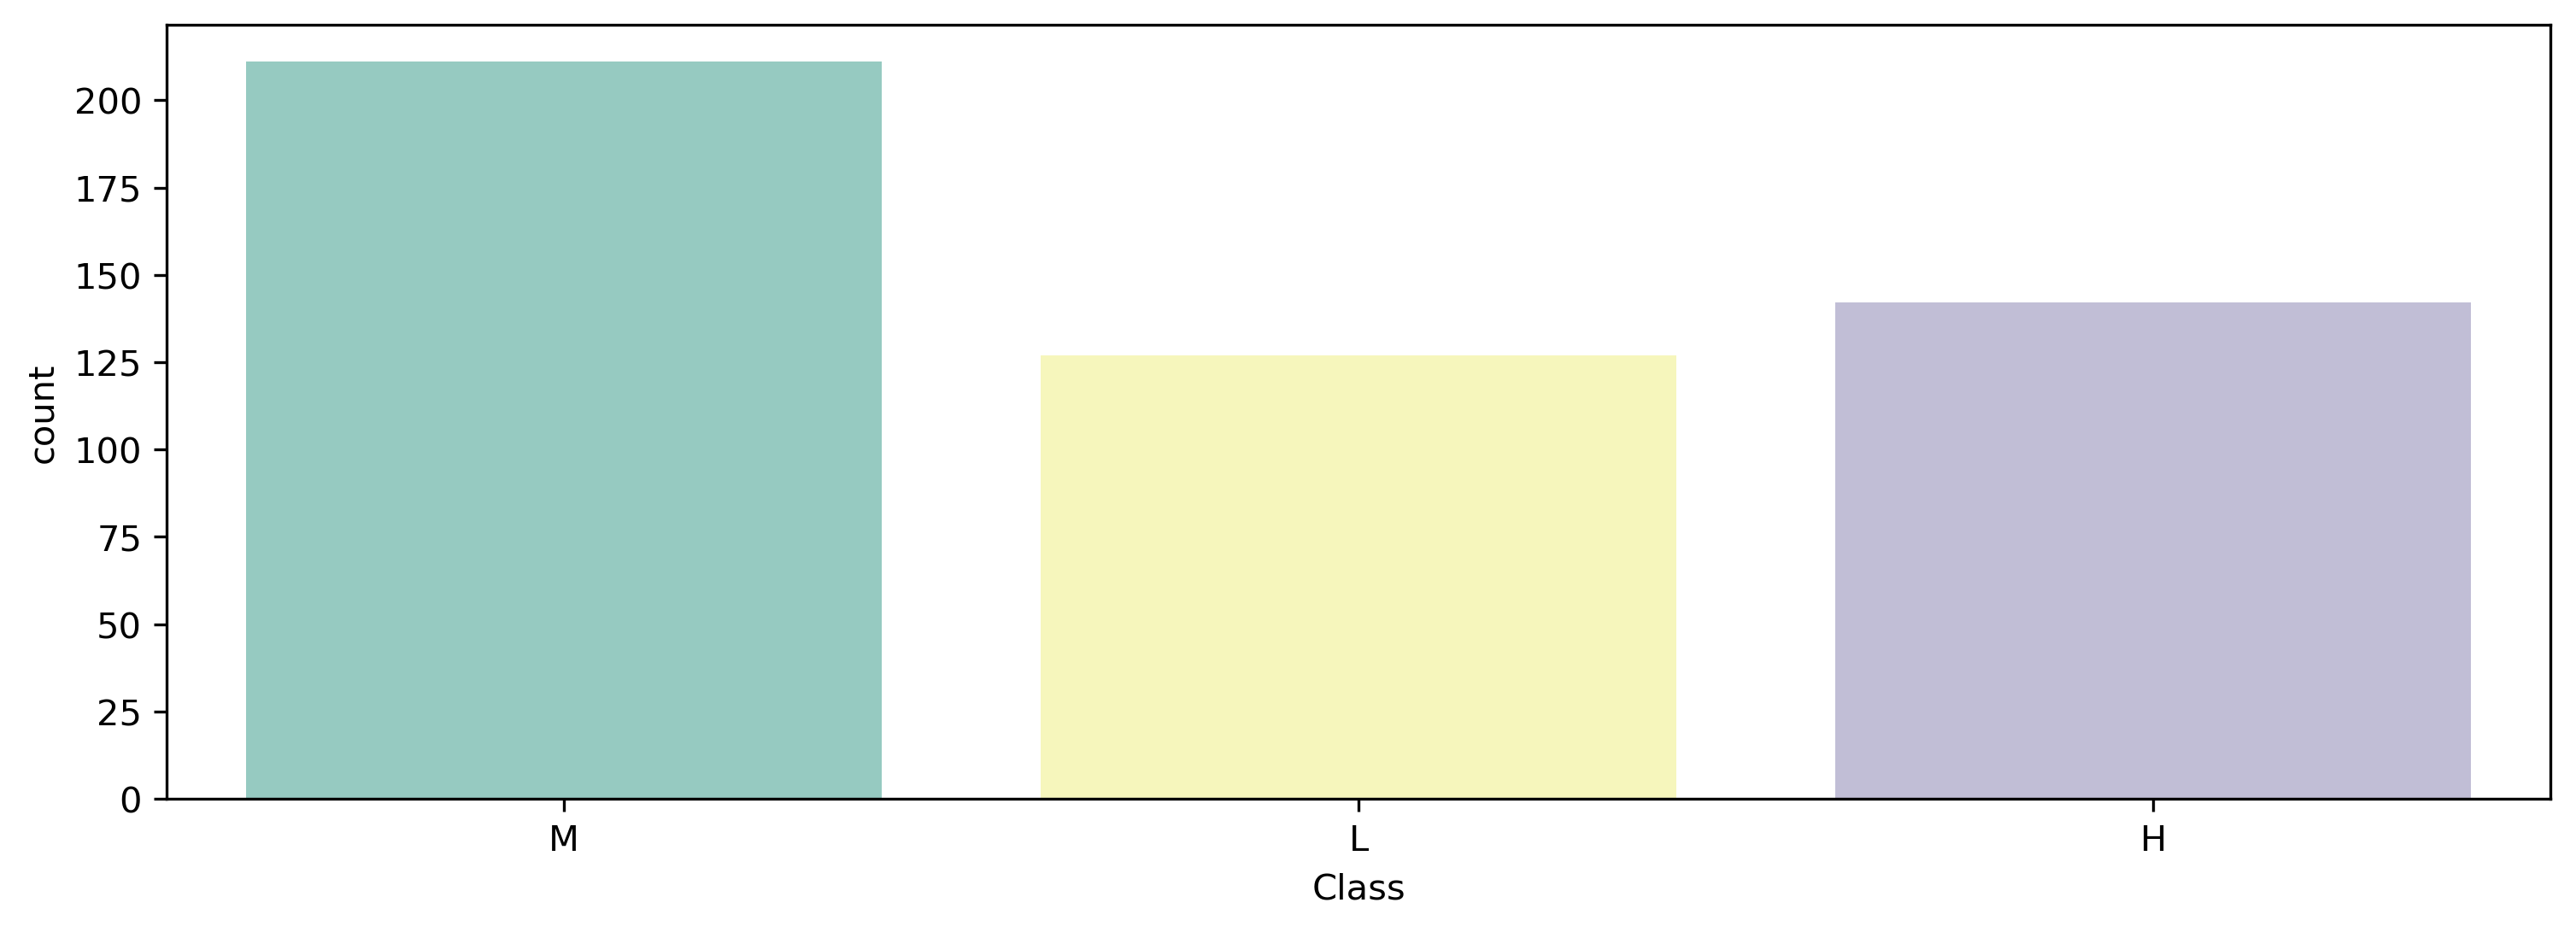

In [43]:
plt.figure(figsize=(12,4), dpi = 300)
sns.countplot(x = 'Class', data = data, palette="Set3")
plt.xticks(rotation = 0)
plt.show()

#### Low-Level: interval includes values from 0 to 69,

#### Middle-Level: interval includes values from 70 to 89,

#### High-Level: interval includes values from 90-100.

<AxesSubplot:>

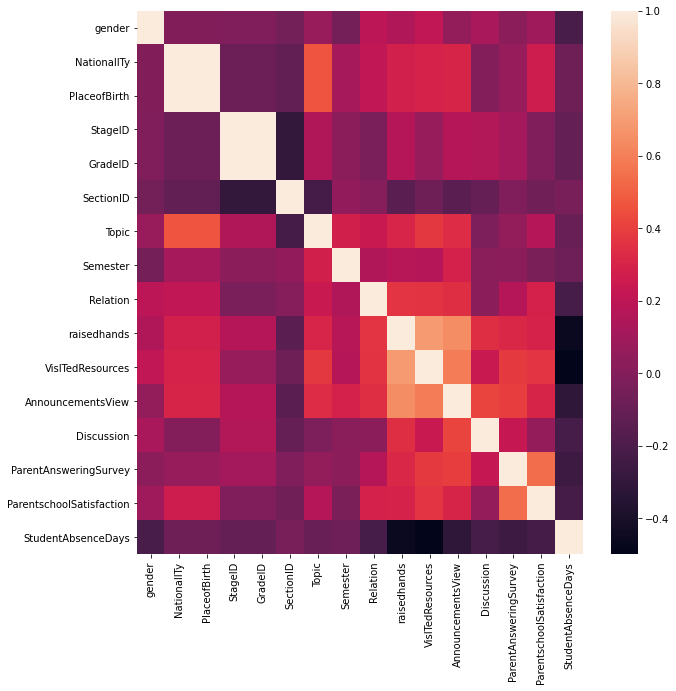

In [44]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr())

In [45]:
data.corr()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays
gender,1.000000,-0.008116,-0.008116,-0.017793,-0.017793,-0.054907,0.071017,-0.049156,0.195142,0.149978,0.210932,0.052139,0.124703,0.022359,0.093478,-0.209011
NationalITy,-0.008116,1.000000,1.000000,-0.084926,-0.084926,-0.122099,0.463798,0.118477,0.213616,0.283838,0.292869,0.298792,0.001144,0.064723,0.261299,-0.080756
PlaceofBirth,-0.008116,1.000000,1.000000,-0.084926,-0.084926,-0.122099,0.463798,0.118477,0.213616,0.283838,0.292869,0.298792,0.001144,0.064723,0.261299,-0.080756
StageID,-0.017793,-0.084926,-0.084926,1.000000,1.000000,-0.296416,0.148853,0.029512,-0.034205,0.172751,0.068621,0.163666,0.161406,0.114025,-0.014272,-0.112536
GradeID,-0.017793,-0.084926,-0.084926,1.000000,1.000000,-0.296416,0.148853,0.029512,-0.034205,0.172751,0.068621,0.163666,0.161406,0.114025,-0.014272,-0.112536
SectionID,-0.054907,-0.122099,-0.122099,-0.296416,-0.296416,1.000000,-0.224213,0.046763,0.005783,-0.143862,-0.080909,-0.144955,-0.102538,-0.018449,-0.070405,-0.037062
Topic,0.071017,0.463798,0.463798,0.148853,0.148853,-0.224213,1.000000,0.279511,0.241447,0.304377,0.378792,0.334392,-0.023449,0.054063,0.165179,-0.098395
Semester,-0.049156,0.118477,0.118477,0.029512,0.029512,0.046763,0.279511,1.000000,0.148705,0.178358,0.173219,0.287066,0.019083,0.023628,-0.025258,-0.072462
Relation,0.195142,0.213616,0.213616,-0.034205,-0.034205,0.005783,0.241447,0.148705,1.000000,0.364237,0.360240,0.339505,0.026720,0.163811,0.287698,-0.219687
raisedhands,0.149978,0.283838,0.283838,0.172751,0.172751,-0.143862,0.304377,0.178358,0.364237,1.000000,0.691572,0.643918,0.339386,0.316570,0.297015,-0.463882


### Logistic Regression

In [46]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

In [47]:
from sklearn.model_selection import train_test_split
y = data['Class']
X = data.drop(columns=['Class'], axis=1)
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.30, random_state=111)

In [48]:
log_reg.fit(X_train,y_train)
pred = log_reg.predict(X_train)
print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
print("_______________________________________________")
print(f"Classification Results:\n{classification_report(y_train, pred)}")
print("_______________________________________________")
print(f"Confusion Matrix : \n {confusion_matrix(y_train, pred)}\n")

Accuracy Score: 73.21%
_______________________________________________
Classification Results:
              precision    recall  f1-score   support

           H       0.71      0.66      0.68        99
           L       0.82      0.85      0.84        93
           M       0.69      0.71      0.70       144

    accuracy                           0.73       336
   macro avg       0.74      0.74      0.74       336
weighted avg       0.73      0.73      0.73       336

_______________________________________________
Confusion Matrix : 
 [[ 65   1  33]
 [  1  79  13]
 [ 26  16 102]]



#### Let's change the test-training ratios.

In [49]:
y = data['Class']
X = data.drop(columns=['Class'], axis=1)
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.20, random_state=111)

In [50]:
log_reg.fit(X_train,y_train)
pred = log_reg.predict(X_train)
print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
print("_______________________________________________")
print(f"Classification Results:\n{classification_report(y_train, pred)}")
print("_______________________________________________")
print(f"Confusion Matrix : \n {confusion_matrix(y_train, pred)}\n")

Accuracy Score: 72.14%
_______________________________________________
Classification Results:
              precision    recall  f1-score   support

           H       0.67      0.69      0.68       112
           L       0.81      0.87      0.84       107
           M       0.69      0.65      0.67       165

    accuracy                           0.72       384
   macro avg       0.72      0.74      0.73       384
weighted avg       0.72      0.72      0.72       384

_______________________________________________
Confusion Matrix : 
 [[ 77   1  34]
 [  1  93  13]
 [ 37  21 107]]



#### Accuracy, precision and recall values decreased overall.

#### Let's try 75% training and 25% testing.

In [51]:
y = data['Class']
X = data.drop(columns=['Class'], axis=1)
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.25, random_state=111)

In [52]:
log_reg.fit(X_train,y_train)
pred = log_reg.predict(X_train)
print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
print("_______________________________________________")
print(f"Classification Results:\n{classification_report(y_train, pred)}")
print("_______________________________________________")
print(f"Confusion Matrix : \n {confusion_matrix(y_train, pred)}\n")

Accuracy Score: 73.33%
_______________________________________________
Classification Results:
              precision    recall  f1-score   support

           H       0.71      0.67      0.69       104
           L       0.81      0.85      0.83       100
           M       0.70      0.70      0.70       156

    accuracy                           0.73       360
   macro avg       0.74      0.74      0.74       360
weighted avg       0.73      0.73      0.73       360

_______________________________________________
Confusion Matrix : 
 [[ 70   1  33]
 [  1  85  14]
 [ 28  19 109]]



#### The 80/20 and 75/25 models performed almost identically. We can use whatever we want.

### Naive Bayes

In [53]:
X=data.drop('Class',axis=1)
y=data["Class"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [54]:
from sklearn.naive_bayes import GaussianNB
gauss=GaussianNB()
gauss.fit(X_train,y_train)

GaussianNB()

In [55]:
y_pred = gauss.predict(X_test)

In [56]:
print("Train Result:\n")
print(f"Accuracy Score: {accuracy_score(y_test, y_pred) * 100:.2f}%")
print("_______________________________________________")
print(f"Classification Results:\n{classification_report(y_test, y_pred)}")
print("_______________________________________________")
print(f"Confusion Matrix: \n {confusion_matrix(y_test, y_pred)}\n")

Train Result:

Accuracy Score: 71.53%
_______________________________________________
Classification Results:
              precision    recall  f1-score   support

           H       0.61      0.79      0.69        39
           L       0.74      0.94      0.83        34
           M       0.80      0.56      0.66        71

    accuracy                           0.72       144
   macro avg       0.72      0.77      0.73       144
weighted avg       0.73      0.72      0.71       144

_______________________________________________
Confusion Matrix: 
 [[31  0  8]
 [ 0 32  2]
 [20 11 40]]



#### Let's try again by changing the test ratios.

In [57]:
X=data.drop('Class',axis=1)
y=data["Class"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [58]:
from sklearn.naive_bayes import GaussianNB
gauss=GaussianNB()
gauss.fit(X_train,y_train)

GaussianNB()

In [59]:
y_pred = gauss.predict(X_test)

In [60]:
print("Train Result:\n")
print(f"Accuracy Score: {accuracy_score(y_test, y_pred) * 100:.2f}%")
print("_______________________________________________")
print(f"Classification Results:\n{classification_report(y_test, y_pred)}")
print("_______________________________________________")
print(f"Confusion Matrix: \n {confusion_matrix(y_test, y_pred)}\n")

Train Result:

Accuracy Score: 68.75%
_______________________________________________
Classification Results:
              precision    recall  f1-score   support

           H       0.58      0.79      0.67        28
           L       0.76      0.96      0.85        23
           M       0.76      0.49      0.59        45

    accuracy                           0.69        96
   macro avg       0.70      0.74      0.70        96
weighted avg       0.71      0.69      0.68        96

_______________________________________________
Confusion Matrix: 
 [[22  0  6]
 [ 0 22  1]
 [16  7 22]]



#### Accuracy value decreased.

In [61]:
X=data.drop('Class',axis=1)
y=data["Class"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.5,random_state=0)

In [62]:

gauss=GaussianNB()
gauss.fit(X_train,y_train)

GaussianNB()

In [63]:
y_pred = gauss.predict(X_test)

In [64]:
print("Train Result:\n")
print(f"Accuracy Score: {accuracy_score(y_test, y_pred) * 100:.2f}%")
print("_______________________________________________")
print(f"Classification Results:\n{classification_report(y_test, y_pred)}")
print("_______________________________________________")
print(f"Confusion Matrix: \n {confusion_matrix(y_test, y_pred)}\n")

Train Result:

Accuracy Score: 71.67%
_______________________________________________
Classification Results:
              precision    recall  f1-score   support

           H       0.66      0.76      0.71        68
           L       0.74      0.90      0.81        60
           M       0.75      0.59      0.66       112

    accuracy                           0.72       240
   macro avg       0.72      0.75      0.73       240
weighted avg       0.72      0.72      0.71       240

_______________________________________________
Confusion Matrix: 
 [[52  0 16]
 [ 0 54  6]
 [27 19 66]]



#### When we compared, 70/30 and 50/50 were close to each other. However, recall and precision values were better in the model trained as 70/30.

### KNN

In [65]:
X=data.drop('Class',axis=1)
y=data["Class"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [66]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_predict = knn.predict(X_test)

In [67]:
print("Train Result:\n")
print(f"Accuracy Score: {accuracy_score(y_test, knn_predict) * 100:.2f}%")
print("_______________________________________________")
print(f"Classification Result:\n{classification_report(y_test, knn_predict)}")
print("_______________________________________________")
print(f"Confusion Matrix: \n {confusion_matrix(y_test, knn_predict)}\n")

Train Result:

Accuracy Score: 65.28%
_______________________________________________
Classification Result:
              precision    recall  f1-score   support

           H       0.55      0.54      0.55        39
           L       0.72      0.82      0.77        34
           M       0.67      0.63      0.65        71

    accuracy                           0.65       144
   macro avg       0.65      0.67      0.65       144
weighted avg       0.65      0.65      0.65       144

_______________________________________________
Confusion Matrix: 
 [[21  2 16]
 [ 0 28  6]
 [17  9 45]]



#### The values are too low.

In [68]:
X=data.drop('Class',axis=1)
y=data["Class"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [69]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_predict = knn.predict(X_test)

In [70]:
print("Train Result:\n")
print(f"Accuracy Score: {accuracy_score(y_test, knn_predict) * 100:.2f}%")
print("_______________________________________________")
print(f"Classification Result:\n{classification_report(y_test, knn_predict)}")
print("_______________________________________________")
print(f"Confusion Matrix: \n {confusion_matrix(y_test, knn_predict)}\n")

Train Result:

Accuracy Score: 68.75%
_______________________________________________
Classification Result:
              precision    recall  f1-score   support

           H       0.63      0.61      0.62        28
           L       0.75      0.91      0.82        23
           M       0.68      0.62      0.65        45

    accuracy                           0.69        96
   macro avg       0.69      0.71      0.70        96
weighted avg       0.68      0.69      0.68        96

_______________________________________________
Confusion Matrix: 
 [[17  0 11]
 [ 0 21  2]
 [10  7 28]]



#### Values increased slightly.

In [71]:
X=data.drop('Class',axis=1)
y=data["Class"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.5,random_state=0)

In [72]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_predict = knn.predict(X_test)

In [73]:
print("Train Result:\n")
print(f"Accuracy Score: {accuracy_score(y_test, knn_predict) * 100:.2f}%")
print("_______________________________________________")
print(f"Classification Result:\n{classification_report(y_test, knn_predict)}")
print("_______________________________________________")
print(f"Confusion Matrix: \n {confusion_matrix(y_test, knn_predict)}\n")

Train Result:

Accuracy Score: 62.50%
_______________________________________________
Classification Result:
              precision    recall  f1-score   support

           H       0.60      0.53      0.56        68
           L       0.68      0.73      0.70        60
           M       0.61      0.62      0.62       112

    accuracy                           0.62       240
   macro avg       0.63      0.63      0.63       240
weighted avg       0.62      0.62      0.62       240

_______________________________________________
Confusion Matrix: 
 [[36  3 29]
 [ 0 44 16]
 [24 18 70]]



#### Overall, 80/20 gave the best performance.

### Decision Tree

In [74]:
X=data.drop('Class',axis=1)
y=data["Class"]

In [75]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)

In [76]:
from sklearn.tree import DecisionTreeClassifier
decisiontree=DecisionTreeClassifier().fit(X_train,y_train)   #default criterion=gini

In [77]:
decisiontreepredict=decisiontree.predict(X_test)

In [78]:
print("Train Result:")
print(f"Accuracy Score: {accuracy_score(y_test, decisiontreepredict) * 100:.2f}%")
print("_______________________________________________")
print(f"Classification Results:\n{classification_report(y_test, decisiontreepredict)}")
print("_______________________________________________")
print(f"Confusion Matrix: \n {confusion_matrix(y_test, decisiontreepredict)}\n")

Train Result:
Accuracy Score: 81.25%
_______________________________________________
Classification Results:
              precision    recall  f1-score   support

           H       0.75      0.75      0.75        28
           L       0.88      0.96      0.92        23
           M       0.81      0.78      0.80        45

    accuracy                           0.81        96
   macro avg       0.81      0.83      0.82        96
weighted avg       0.81      0.81      0.81        96

_______________________________________________
Confusion Matrix: 
 [[21  0  7]
 [ 0 22  1]
 [ 7  3 35]]



#### Let's try with criterion=entropy.

In [79]:
X=data.drop('Class',axis=1)
y=data["Class"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)
DecisionTreeClassifier(criterion="entropy").fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [80]:
decisiontreepredict=decisiontree.predict(X_test)

In [81]:
print("Train Result:")
print(f"Accuracy Score: {accuracy_score(y_test, decisiontreepredict) * 100:.2f}%")
print("_______________________________________________")
print(f"Classification Results:\n{classification_report(y_test, decisiontreepredict)}")
print("_______________________________________________")
print(f"Confusion Matrix: \n {confusion_matrix(y_test, decisiontreepredict)}\n")

Train Result:
Accuracy Score: 81.25%
_______________________________________________
Classification Results:
              precision    recall  f1-score   support

           H       0.75      0.75      0.75        28
           L       0.88      0.96      0.92        23
           M       0.81      0.78      0.80        45

    accuracy                           0.81        96
   macro avg       0.81      0.83      0.82        96
weighted avg       0.81      0.81      0.81        96

_______________________________________________
Confusion Matrix: 
 [[21  0  7]
 [ 0 22  1]
 [ 7  3 35]]



#### Let's change min_samples_split. default is 2.

In [82]:
X=data.drop('Class',axis=1)
y=data["Class"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)
DecisionTreeClassifier(criterion="entropy",min_samples_split=4).fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', min_samples_split=4)

In [83]:
decisiontreepredict=decisiontree.predict(X_test)

In [84]:
print("Train Result:")
print(f"Accuracy Score: {accuracy_score(y_test, decisiontreepredict) * 100:.2f}%")
print("_______________________________________________")
print(f"Classification Results:\n{classification_report(y_test, decisiontreepredict)}")
print("_______________________________________________")
print(f"Confusion Matrix: \n {confusion_matrix(y_test, decisiontreepredict)}\n")

Train Result:
Accuracy Score: 81.25%
_______________________________________________
Classification Results:
              precision    recall  f1-score   support

           H       0.75      0.75      0.75        28
           L       0.88      0.96      0.92        23
           M       0.81      0.78      0.80        45

    accuracy                           0.81        96
   macro avg       0.81      0.83      0.82        96
weighted avg       0.81      0.81      0.81        96

_______________________________________________
Confusion Matrix: 
 [[21  0  7]
 [ 0 22  1]
 [ 7  3 35]]



#### All values were the same.

In [85]:
X=data.drop('Class',axis=1)
y=data["Class"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)
DecisionTreeClassifier(criterion="entropy",min_samples_leaf=4).fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', min_samples_leaf=4)

In [86]:
decisiontreepredict=decisiontree.predict(X_test)

In [87]:
print("Train Result:")
print(f"Accuracy Score: {accuracy_score(y_test, decisiontreepredict) * 100:.2f}%")
print("_______________________________________________")
print(f"Classification Results:\n{classification_report(y_test, decisiontreepredict)}")
print("_______________________________________________")
print(f"Confusion Matrix: \n {confusion_matrix(y_test, decisiontreepredict)}\n")

Train Result:
Accuracy Score: 81.25%
_______________________________________________
Classification Results:
              precision    recall  f1-score   support

           H       0.75      0.75      0.75        28
           L       0.88      0.96      0.92        23
           M       0.81      0.78      0.80        45

    accuracy                           0.81        96
   macro avg       0.81      0.83      0.82        96
weighted avg       0.81      0.81      0.81        96

_______________________________________________
Confusion Matrix: 
 [[21  0  7]
 [ 0 22  1]
 [ 7  3 35]]



#### Again,all values were the same.

#### Let's change the test rates.

In [88]:
X=data.drop('Class',axis=1)
y=data["Class"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.50,random_state=0)
DecisionTreeClassifier(criterion="entropy").fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [89]:
decisiontreepredict=decisiontree.predict(X_test)

In [90]:
print("Train Result:")
print(f"Accuracy Score: {accuracy_score(y_test, decisiontreepredict) * 100:.2f}%")
print("_______________________________________________")
print(f"Classification Results:\n{classification_report(y_test, decisiontreepredict)}")
print("_______________________________________________")
print(f"Confusion Matrix: \n {confusion_matrix(y_test, decisiontreepredict)}\n")

Train Result:
Accuracy Score: 92.50%
_______________________________________________
Classification Results:
              precision    recall  f1-score   support

           H       0.90      0.90      0.90        68
           L       0.95      0.98      0.97        60
           M       0.93      0.91      0.92       112

    accuracy                           0.93       240
   macro avg       0.93      0.93      0.93       240
weighted avg       0.92      0.93      0.92       240

_______________________________________________
Confusion Matrix: 
 [[ 61   0   7]
 [  0  59   1]
 [  7   3 102]]



In [91]:
test= y_test.to_numpy()

In [92]:
test

array(['M', 'L', 'L', 'M', 'H', 'M', 'H', 'L', 'L', 'M', 'H', 'M', 'M',
       'L', 'H', 'M', 'M', 'L', 'M', 'H', 'L', 'M', 'M', 'M', 'M', 'H',
       'M', 'M', 'M', 'L', 'M', 'L', 'H', 'M', 'M', 'M', 'H', 'H', 'M',
       'M', 'H', 'L', 'M', 'H', 'H', 'M', 'M', 'M', 'M', 'L', 'M', 'H',
       'H', 'L', 'H', 'H', 'L', 'L', 'M', 'M', 'M', 'M', 'H', 'H', 'H',
       'M', 'M', 'M', 'L', 'L', 'L', 'L', 'M', 'L', 'H', 'M', 'M', 'L',
       'M', 'L', 'M', 'M', 'H', 'L', 'L', 'H', 'M', 'H', 'M', 'H', 'M',
       'H', 'H', 'H', 'M', 'H', 'L', 'M', 'L', 'H', 'L', 'M', 'M', 'M',
       'M', 'H', 'L', 'H', 'L', 'M', 'L', 'L', 'L', 'L', 'M', 'M', 'L',
       'H', 'M', 'H', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'L', 'M',
       'H', 'M', 'H', 'M', 'M', 'H', 'M', 'M', 'M', 'H', 'M', 'M', 'H',
       'H', 'H', 'L', 'H', 'L', 'L', 'H', 'M', 'M', 'M', 'M', 'H', 'M',
       'L', 'H', 'M', 'L', 'M', 'M', 'L', 'M', 'H', 'M', 'M', 'M', 'M',
       'M', 'L', 'M', 'H', 'H', 'L', 'M', 'H', 'M', 'M', 'L', 'H

In [93]:
df = pd.DataFrame (test)

## save to xlsx file

filepath = 'decision_tree_test_file.xlsx'
df.to_excel(filepath, index=False)

In [94]:
df = pd.DataFrame (decisiontreepredict)

## save to xlsx file

filepath = 'decision_tree_predict_file.xlsx'
df.to_excel(filepath, index=False)

In [95]:
tests = pd. read_excel('decision_tree_test_file.xlsx')
predicts=pd.read_excel('decision_tree_predict_file.xlsx')

In [96]:
df=tests.merge(predicts)
df.to_excel("karsilastirma.xlsx",index=False)

#### Values have increased significantly.

In [97]:
X=data.drop('Class',axis=1)
y=data["Class"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)
DecisionTreeClassifier(criterion="entropy").fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [98]:
decisiontreepredict=decisiontree.predict(X_test)

In [99]:
print("Train Result:")
print(f"Accuracy Score: {accuracy_score(y_test, decisiontreepredict) * 100:.2f}%")
print("_______________________________________________")
print(f"Classification Results:\n{classification_report(y_test, decisiontreepredict)}")
print("_______________________________________________")
print(f"Confusion Matrix: \n {confusion_matrix(y_test, decisiontreepredict)}\n")

Train Result:
Accuracy Score: 85.00%
_______________________________________________
Classification Results:
              precision    recall  f1-score   support

           H       0.79      0.79      0.79        33
           L       0.91      0.97      0.94        33
           M       0.85      0.81      0.83        54

    accuracy                           0.85       120
   macro avg       0.85      0.86      0.85       120
weighted avg       0.85      0.85      0.85       120

_______________________________________________
Confusion Matrix: 
 [[26  0  7]
 [ 0 32  1]
 [ 7  3 44]]



In [100]:
X=data.drop('Class',axis=1)
y=data["Class"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.50,random_state=111)
DecisionTreeClassifier().fit(X_train,y_train)

DecisionTreeClassifier()

In [101]:
decisiontreepredict=decisiontree.predict(X_test)

In [102]:
print("Train Result:")
print(f"Accuracy Score: {accuracy_score(y_test, decisiontreepredict) * 100:.2f}%")
print("_______________________________________________")
print(f"Classification Results:\n{classification_report(y_test, decisiontreepredict)}")
print("_______________________________________________")
print(f"Confusion Matrix: \n {confusion_matrix(y_test, decisiontreepredict)}\n")

Train Result:
Accuracy Score: 97.50%
_______________________________________________
Classification Results:
              precision    recall  f1-score   support

           H       0.99      0.94      0.96        70
           L       0.98      1.00      0.99        58
           M       0.96      0.98      0.97       112

    accuracy                           0.97       240
   macro avg       0.98      0.97      0.98       240
weighted avg       0.98      0.97      0.97       240

_______________________________________________
Confusion Matrix: 
 [[ 66   0   4]
 [  0  58   0]
 [  1   1 110]]



In [103]:
X_test

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays
242,0,1,1,2,2,2,4,2,1,22,20,18,6,0,0,1
405,1,11,11,2,2,1,10,2,2,80,91,87,72,1,1,0
439,0,6,6,2,2,1,11,2,2,70,82,75,29,1,1,0
259,0,1,1,1,1,1,5,2,2,69,34,12,17,0,0,1
371,0,6,6,1,1,1,3,2,1,35,2,29,23,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402,0,6,6,2,2,1,10,1,1,76,81,80,86,0,1,0
41,0,1,1,2,2,1,1,1,1,19,20,16,50,0,1,0
124,0,1,1,1,1,3,1,1,1,0,6,4,15,1,0,0
394,0,6,6,2,2,1,10,1,2,78,91,50,40,1,1,0


In [104]:
y_test

242    L
405    H
439    M
259    L
371    M
      ..
402    H
41     M
124    L
394    H
161    M
Name: Class, Length: 240, dtype: object

In [105]:
X_test_df=X_test.reset_index()

In [106]:
y_test_df=y_test.reset_index()

In [107]:
merge1=X_test_df.merge(y_test_df)

In [108]:
predict_data_frame = pd.DataFrame (decisiontreepredict)

In [109]:
predict_data_frame

,0
0,L
1,H
2,M
3,L
4,M
...,...
235,H
236,M
237,L
238,H


In [110]:
filepath = 'predict_first.xlsx'
predict_data_frame.to_excel(filepath, index=False)

In [111]:
filepath = 'merge1.xlsx'
merge1.to_excel(filepath, index=False)

In [112]:
predict_data_frame=pd.read_csv('predict_first.csv')

In [113]:
predict_data_frame

,index,Predict
0,242,L
1,405,H
2,439,M
3,259,L
4,371,M
...,...,...
235,402,H
236,41,M
237,124,L
238,394,H


In [114]:
merge2=pd.merge(merge1,predict_data_frame)

In [115]:
filepath = 'merge2.xlsx'
merge2.to_excel(filepath, index=False)

#### When we look at the accuracy, precision and recall values, we see that the model with 50%/50% and criterion=entropy gives the best result. 

### Cross Validation

In [116]:
y = data.Class
X = data.drop('Class', axis=1)
print(len(X), len(y))

480 480


In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print("Eğitim veri kümesindeki satır sayısı :  {} ".format(len(X_train)))
print("Eğitim veri kümesindeki hedef sayısı :  {} ".format(len(y_train)))
print("Test veri kümesindeki satır sayısı :  {} ".format(len(X_test)))
print("Test veri kümesindeki hedef sayısı :  {} ".format(len(y_test)))

Eğitim veri kümesindeki satır sayısı :  384 
Eğitim veri kümesindeki hedef sayısı :  384 
Test veri kümesindeki satır sayısı :  96 
Test veri kümesindeki hedef sayısı :  96 


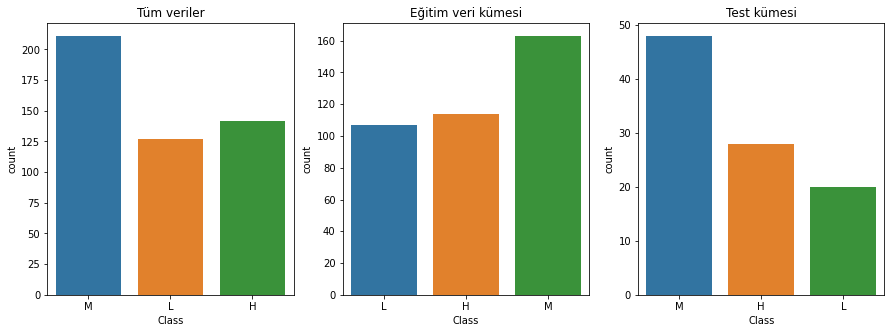

In [118]:
plt.figure(figsize=(15,5))
plt.subplot(131)
sns.countplot(y)
plt.title("Tüm veriler")
plt.subplot(132)
sns.countplot(y_train)
plt.title("Eğitim veri kümesi")
plt.subplot(133)
sns.countplot(y_test)
plt.title("Test kümesi")
plt.show()

In [119]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, shuffle=True, random_state=1111)

In [120]:
parcalar = kf.split(X)
for num, (eğitim_index, test_index) in enumerate(parcalar):
    print("{}.Eğitim Kümesi Boyutu : {}".format(num+1,len(eğitim_index)))
    print("{}.Test Kümesi Boyutu   : {}".format(num+1,len(test_index)))
    print('-'*27)

1.Eğitim Kümesi Boyutu : 384
1.Test Kümesi Boyutu   : 96
---------------------------
2.Eğitim Kümesi Boyutu : 384
2.Test Kümesi Boyutu   : 96
---------------------------
3.Eğitim Kümesi Boyutu : 384
3.Test Kümesi Boyutu   : 96
---------------------------
4.Eğitim Kümesi Boyutu : 384
4.Test Kümesi Boyutu   : 96
---------------------------
5.Eğitim Kümesi Boyutu : 384
5.Test Kümesi Boyutu   : 96
---------------------------


In [121]:
from sklearn.metrics import mean_squared_error

model2 = LogisticRegression()

pieces = kf.split(X)
score_list = []

for a, (train_index, test_indeks) in enumerate(pieces):
    X_train, y_train = X.iloc[train_index], y.iloc[train_index]

    X_test, y_test = X.iloc[test_index], y.iloc[test_index]

    
    model2.fit(X_train, y_train)
    
    prediction = model2.predict(X_test)
    
    score = model2.score(X_test, y_test)  
    score_list.append(score)
    
    print("Piece No.{} score: {:.8f}".format(a+1,score))
    print("-"*23, "\n")

Piece No.1 score: 0.79166667
----------------------- 

Piece No.2 score: 0.71875000
----------------------- 

Piece No.3 score: 0.75000000
----------------------- 

Piece No.4 score: 0.73958333
----------------------- 

Piece No.5 score: 0.75000000
----------------------- 



In [122]:
print("Mean score : {:.2f}".format(np.mean(score_list)))

Mean score : 0.75


In [123]:
from sklearn.model_selection import cross_validate, cross_val_score
log_reg_model = LogisticRegression()

cv = cross_validate(estimator=log_reg_model,
                    X=X,
                    y=y,
                    cv=10,
                    return_train_score=True,
                   )

print('Train Scores :', cv['train_score'], sep = '\n')
print("-"*50)
print('Test Scores     :', cv['test_score'], sep = '\n')

Train Scores :
[0.73148148 0.72222222 0.72453704 0.71990741 0.72685185 0.72916667
 0.73842593 0.7337963  0.75231481 0.71990741]
--------------------------------------------------
Test Scores     :
[0.625      0.6875     0.58333333 0.6875     0.70833333 0.64583333
 0.47916667 0.875      0.58333333 0.64583333]


In [124]:
print('Mean score of train set : ', cv['train_score'].mean())
print('Mean score of test set  : ', cv['test_score'].mean())

Mean score of train set :  0.7298611111111112
Mean score of test set  :  0.6520833333333333


In [125]:
cv = cross_val_score(estimator=log_reg_model,
                     X=X,
                     y=y,
                     cv=10,
                    )

print('Model Scores : ', cv, sep = '\n')
print("Mean score : {:.2f}".format(np.mean(cv)))

Model Scores : 
[0.625      0.6875     0.58333333 0.6875     0.70833333 0.64583333
 0.47916667 0.875      0.58333333 0.64583333]
Mean score : 0.65


#### Let's use Grid Search

In [126]:
parameters = {"C": [10 ** x for x in range (-5, 5, 1)],
              "penalty": ['l1', 'l2']
             }
from sklearn.model_selection import GridSearchCV

grid_cv = GridSearchCV(estimator=log_reg_model,
                       param_grid = parameters,
                       cv = 10
                      )

grid_cv.fit(X, y)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100,
                               1000, 10000],
                         'penalty': ['l1', 'l2']})

In [127]:
print("Best Parameters : ", grid_cv.best_params_)
print("Best Score      : ", grid_cv.best_score_)

Best Parameters :  {'C': 1000, 'penalty': 'l2'}
Best Score      :  0.6625


In [128]:
results = grid_cv.cv_results_

df = pd.DataFrame(results)
df = df[['param_penalty','param_C', 'mean_test_score']]
df = df.sort_values(by='mean_test_score', ascending = False)
df.head(5)

,param_penalty,param_C,mean_test_score
17,l2,1000,0.662500
15,l2,100,0.658333
11,l2,1,0.652083
19,l2,10000,0.652083
13,l2,10,0.650000


#### The best score was given at l2 and 1000.

----------------------------

### Let's cross validation with Random Forest.

In [129]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, shuffle=True, random_state=1111)

In [130]:
from sklearn.metrics import mean_squared_error

model2 = DecisionTreeClassifier()

pieces = kf.split(X)
score_list = []

for a, (train_index, test_indeks) in enumerate(pieces):
    X_train, y_train = X.iloc[train_index], y.iloc[train_index]

    X_test, y_test = X.iloc[test_index], y.iloc[test_index]

    
    model2.fit(X_train, y_train)
    
    prediction = model2.predict(X_test)
    
    score = model2.score(X_test, y_test)  
    score_list.append(score)
    
    print("Piece No.{} score: {:.8f}".format(a+1,score))
    print("-"*23, "\n")

Piece No.1 score: 1.00000000
----------------------- 

Piece No.2 score: 1.00000000
----------------------- 

Piece No.3 score: 1.00000000
----------------------- 

Piece No.4 score: 1.00000000
----------------------- 

Piece No.5 score: 0.73958333
----------------------- 



In [131]:
print("Mean score : {:.2f}".format(np.mean(score_list)))

Mean score : 0.95


__________________________________________________________

__________________________________________________________

## I delete one of the two almost identical columns to remove the curse of dimensionality.

In [132]:
data.drop('NationalITy', axis=1, inplace=True)

In [133]:
data

,gender,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,0,1,1,1,1,1,1,1,15,16,2,20,1,1,0,M
1,0,1,1,1,1,1,1,1,20,20,3,25,1,1,0,M
2,0,1,1,1,1,1,1,1,10,7,0,30,0,0,1,L
3,0,1,1,1,1,1,1,1,30,25,5,35,0,0,1,L
4,0,1,1,1,1,1,1,1,40,50,12,50,0,0,1,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,1,6,2,2,1,11,2,1,5,4,5,8,0,0,1,L
476,1,6,2,2,1,12,1,1,50,77,14,28,0,0,0,M
477,1,6,2,2,1,12,2,1,55,74,25,29,0,0,0,M
478,1,6,2,2,1,9,1,1,30,17,14,57,0,0,1,L


####  Logistic Regression

In [134]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

In [135]:
from sklearn.model_selection import train_test_split
y = data['Class']
X = data.drop(columns=['Class'], axis=1)
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.30, random_state=111)

In [136]:
log_reg.fit(X_train,y_train)
pred = log_reg.predict(X_train)
print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
print("_______________________________________________")
print(f"Classification Results:\n{classification_report(y_train, pred)}")
print("_______________________________________________")
print(f"Confusion Matrix : \n {confusion_matrix(y_train, pred)}\n")

Accuracy Score: 72.62%
_______________________________________________
Classification Results:
              precision    recall  f1-score   support

           H       0.69      0.69      0.69        99
           L       0.80      0.87      0.84        93
           M       0.70      0.66      0.68       144

    accuracy                           0.73       336
   macro avg       0.73      0.74      0.73       336
weighted avg       0.72      0.73      0.72       336

_______________________________________________
Confusion Matrix : 
 [[68  1 30]
 [ 1 81 11]
 [30 19 95]]



#### We got a lower accuracy than without dropping the column, but the precision and recall values increased slightly. Let's try changing the test-train ratios.

In [137]:
y = data['Class']
X = data.drop(columns=['Class'], axis=1)
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.20, random_state=111)

In [138]:
log_reg.fit(X_train,y_train)
pred = log_reg.predict(X_train)
print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
print("_______________________________________________")
print(f"Classification Results:\n{classification_report(y_train, pred)}")
print("_______________________________________________")
print(f"Confusion Matrix : \n {confusion_matrix(y_train, pred)}\n")

Accuracy Score: 71.61%
_______________________________________________
Classification Results:
              precision    recall  f1-score   support

           H       0.67      0.66      0.66       112
           L       0.81      0.87      0.84       107
           M       0.68      0.65      0.67       165

    accuracy                           0.72       384
   macro avg       0.72      0.73      0.72       384
weighted avg       0.71      0.72      0.71       384

_______________________________________________
Confusion Matrix : 
 [[ 74   1  37]
 [  1  93  13]
 [ 36  21 108]]



#### The values were better in the 80/20 model before I dropped the column.

In [139]:
y = data['Class']
X = data.drop(columns=['Class'], axis=1)
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.25, random_state=111)

In [140]:
log_reg.fit(X_train,y_train)
pred = log_reg.predict(X_train)
print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
print("_______________________________________________")
print(f"Classification Results:\n{classification_report(y_train, pred)}")
print("_______________________________________________")
print(f"Confusion Matrix : \n {confusion_matrix(y_train, pred)}\n")

Accuracy Score: 74.72%
_______________________________________________
Classification Results:
              precision    recall  f1-score   support

           H       0.73      0.70      0.72       104
           L       0.80      0.86      0.83       100
           M       0.72      0.71      0.71       156

    accuracy                           0.75       360
   macro avg       0.75      0.76      0.75       360
weighted avg       0.75      0.75      0.75       360

_______________________________________________
Confusion Matrix : 
 [[ 73   1  30]
 [  1  86  13]
 [ 26  20 110]]



#### It was slightly better than the previous 75/25 model.

### Naive Bayes

In [141]:
X=data.drop('Class',axis=1)
y=data["Class"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [142]:
gauss=GaussianNB()
gauss.fit(X_train,y_train)

GaussianNB()

In [143]:
y_pred = gauss.predict(X_test)

In [144]:
print("Train Result:\n")
print(f"Accuracy Score: {accuracy_score(y_test, y_pred) * 100:.2f}%")
print("_______________________________________________")
print(f"Classification Results:\n{classification_report(y_test, y_pred)}")
print("_______________________________________________")
print(f"Confusion Matrix: \n {confusion_matrix(y_test, y_pred)}\n")

Train Result:

Accuracy Score: 69.44%
_______________________________________________
Classification Results:
              precision    recall  f1-score   support

           H       0.58      0.77      0.66        39
           L       0.76      0.91      0.83        34
           M       0.76      0.55      0.64        71

    accuracy                           0.69       144
   macro avg       0.70      0.74      0.71       144
weighted avg       0.71      0.69      0.69       144

_______________________________________________
Confusion Matrix: 
 [[30  0  9]
 [ 0 31  3]
 [22 10 39]]



#### The values are slightly lower than before.

In [145]:
X=data.drop('Class',axis=1)
y=data["Class"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [146]:
gauss=GaussianNB()
gauss.fit(X_train,y_train)

GaussianNB()

In [147]:
y_pred = gauss.predict(X_test)

In [148]:
print("Train Result:\n")
print(f"Accuracy Score: {accuracy_score(y_test, y_pred) * 100:.2f}%")
print("_______________________________________________")
print(f"Classification Results:\n{classification_report(y_test, y_pred)}")
print("_______________________________________________")
print(f"Confusion Matrix: \n {confusion_matrix(y_test, y_pred)}\n")

Train Result:

Accuracy Score: 70.83%
_______________________________________________
Classification Results:
              precision    recall  f1-score   support

           H       0.59      0.82      0.69        28
           L       0.79      0.96      0.86        23
           M       0.79      0.51      0.62        45

    accuracy                           0.71        96
   macro avg       0.72      0.76      0.72        96
weighted avg       0.73      0.71      0.70        96

_______________________________________________
Confusion Matrix: 
 [[23  0  5]
 [ 0 22  1]
 [16  6 23]]



#### Values are slightly higher than before.

In [149]:
X=data.drop('Class',axis=1)
y=data["Class"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.5,random_state=0)

In [150]:
gauss=GaussianNB()
gauss.fit(X_train,y_train)

GaussianNB()

In [151]:
y_pred = gauss.predict(X_test)

In [152]:
print("Train Result:\n")
print(f"Accuracy Score: {accuracy_score(y_test, y_pred) * 100:.2f}%")
print("_______________________________________________")
print(f"Classification Results:\n{classification_report(y_test, y_pred)}")
print("_______________________________________________")
print(f"Confusion Matrix: \n {confusion_matrix(y_test, y_pred)}\n")

Train Result:

Accuracy Score: 70.83%
_______________________________________________
Classification Results:
              precision    recall  f1-score   support

           H       0.64      0.78      0.70        68
           L       0.73      0.92      0.81        60
           M       0.76      0.55      0.64       112

    accuracy                           0.71       240
   macro avg       0.71      0.75      0.72       240
weighted avg       0.72      0.71      0.70       240

_______________________________________________
Confusion Matrix: 
 [[53  0 15]
 [ 0 55  5]
 [30 20 62]]



#### The values are slightly lower than before.

### KNN

In [153]:
X=data.drop('Class',axis=1)
y=data["Class"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_predict = knn.predict(X_test)

In [154]:
print("Train Result:\n")
print(f"Accuracy Score: {accuracy_score(y_test, knn_predict) * 100:.2f}%")
print("_______________________________________________")
print(f"Classification Result:\n{classification_report(y_test, knn_predict)}")
print("_______________________________________________")
print(f"Confusion Matrix: \n {confusion_matrix(y_test, knn_predict)}\n")

Train Result:

Accuracy Score: 62.50%
_______________________________________________
Classification Result:
              precision    recall  f1-score   support

           H       0.51      0.54      0.53        39
           L       0.71      0.79      0.75        34
           M       0.65      0.59      0.62        71

    accuracy                           0.62       144
   macro avg       0.62      0.64      0.63       144
weighted avg       0.63      0.62      0.62       144

_______________________________________________
Confusion Matrix: 
 [[21  2 16]
 [ 0 27  7]
 [20  9 42]]



#### The values are slightly lower than before.

In [155]:
X=data.drop('Class',axis=1)
y=data["Class"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_predict = knn.predict(X_test)

In [156]:
print("Train Result:\n")
print(f"Accuracy Score: {accuracy_score(y_test, knn_predict) * 100:.2f}%")
print("_______________________________________________")
print(f"Classification Result:\n{classification_report(y_test, knn_predict)}")
print("_______________________________________________")
print(f"Confusion Matrix: \n {confusion_matrix(y_test, knn_predict)}\n")

Train Result:

Accuracy Score: 62.50%
_______________________________________________
Classification Result:
              precision    recall  f1-score   support

           H       0.51      0.54      0.53        39
           L       0.71      0.79      0.75        34
           M       0.65      0.59      0.62        71

    accuracy                           0.62       144
   macro avg       0.62      0.64      0.63       144
weighted avg       0.63      0.62      0.62       144

_______________________________________________
Confusion Matrix: 
 [[21  2 16]
 [ 0 27  7]
 [20  9 42]]



#### The values are slightly lower than before.

In [157]:
X=data.drop('Class',axis=1)
y=data["Class"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.5,random_state=0)
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_predict = knn.predict(X_test)

In [158]:
print("Train Result:\n")
print(f"Accuracy Score: {accuracy_score(y_test, knn_predict) * 100:.2f}%")
print("_______________________________________________")
print(f"Classification Result:\n{classification_report(y_test, knn_predict)}")
print("_______________________________________________")
print(f"Confusion Matrix: \n {confusion_matrix(y_test, knn_predict)}\n")

Train Result:

Accuracy Score: 61.25%
_______________________________________________
Classification Result:
              precision    recall  f1-score   support

           H       0.58      0.53      0.55        68
           L       0.66      0.75      0.70        60
           M       0.60      0.59      0.59       112

    accuracy                           0.61       240
   macro avg       0.61      0.62      0.62       240
weighted avg       0.61      0.61      0.61       240

_______________________________________________
Confusion Matrix: 
 [[36  3 29]
 [ 0 45 15]
 [26 20 66]]



#### The values are slightly lower than before.

### Decision Tree

In [159]:
X=data.drop('Class',axis=1)
y=data["Class"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)
from sklearn.tree import DecisionTreeClassifier
decisiontree=DecisionTreeClassifier().fit(X_train,y_train)   #default criterion=gini
decisiontreepredict=decisiontree.predict(X_test)

In [160]:
print("Train Result:")
print(f"Accuracy Score: {accuracy_score(y_test, decisiontreepredict) * 100:.2f}%")
print("_______________________________________________")
print(f"Classification Results:\n{classification_report(y_test, decisiontreepredict)}")
print("_______________________________________________")
print(f"Confusion Matrix: \n {confusion_matrix(y_test, decisiontreepredict)}\n")

Train Result:
Accuracy Score: 78.12%
_______________________________________________
Classification Results:
              precision    recall  f1-score   support

           H       0.71      0.71      0.71        28
           L       0.81      0.96      0.88        23
           M       0.80      0.73      0.77        45

    accuracy                           0.78        96
   macro avg       0.78      0.80      0.79        96
weighted avg       0.78      0.78      0.78        96

_______________________________________________
Confusion Matrix: 
 [[20  1  7]
 [ 0 22  1]
 [ 8  4 33]]



#### Values rose acceptably compared to the previous model.

In [161]:
X=data.drop('Class',axis=1)
y=data["Class"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)
DecisionTreeClassifier(criterion="entropy").fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [162]:
decisiontreepredict=decisiontree.predict(X_test)

In [163]:
print("Train Result:")
print(f"Accuracy Score: {accuracy_score(y_test, decisiontreepredict) * 100:.2f}%")
print("_______________________________________________")
print(f"Classification Results:\n{classification_report(y_test, decisiontreepredict)}")
print("_______________________________________________")
print(f"Confusion Matrix: \n {confusion_matrix(y_test, decisiontreepredict)}\n")

Train Result:
Accuracy Score: 78.12%
_______________________________________________
Classification Results:
              precision    recall  f1-score   support

           H       0.71      0.71      0.71        28
           L       0.81      0.96      0.88        23
           M       0.80      0.73      0.77        45

    accuracy                           0.78        96
   macro avg       0.78      0.80      0.79        96
weighted avg       0.78      0.78      0.78        96

_______________________________________________
Confusion Matrix: 
 [[20  1  7]
 [ 0 22  1]
 [ 8  4 33]]



#### Values rose acceptably compared to the previous model.

In [164]:
X=data.drop('Class',axis=1)
y=data["Class"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.50,random_state=0)
DecisionTreeClassifier(criterion="entropy").fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [165]:
decisiontreepredict=decisiontree.predict(X_test)

In [166]:
print("Train Result:")
print(f"Accuracy Score: {accuracy_score(y_test, decisiontreepredict) * 100:.2f}%")
print("_______________________________________________")
print(f"Classification Results:\n{classification_report(y_test, decisiontreepredict)}")
print("_______________________________________________")
print(f"Confusion Matrix: \n {confusion_matrix(y_test, decisiontreepredict)}\n")

Train Result:
Accuracy Score: 91.25%
_______________________________________________
Classification Results:
              precision    recall  f1-score   support

           H       0.88      0.88      0.88        68
           L       0.92      0.98      0.95        60
           M       0.93      0.89      0.91       112

    accuracy                           0.91       240
   macro avg       0.91      0.92      0.91       240
weighted avg       0.91      0.91      0.91       240

_______________________________________________
Confusion Matrix: 
 [[ 60   1   7]
 [  0  59   1]
 [  8   4 100]]



#### The value increased compared to the previous model.

In [167]:
X=data.drop('Class',axis=1)
y=data["Class"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)
DecisionTreeClassifier(criterion="entropy").fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [168]:
decisiontreepredict=decisiontree.predict(X_test)

In [169]:
print("Train Result:")
print(f"Accuracy Score: {accuracy_score(y_test, decisiontreepredict) * 100:.2f}%")
print("_______________________________________________")
print(f"Classification Results:\n{classification_report(y_test, decisiontreepredict)}")
print("_______________________________________________")
print(f"Confusion Matrix: \n {confusion_matrix(y_test, decisiontreepredict)}\n")

Train Result:
Accuracy Score: 82.50%
_______________________________________________
Classification Results:
              precision    recall  f1-score   support

           H       0.76      0.76      0.76        33
           L       0.86      0.97      0.91        33
           M       0.84      0.78      0.81        54

    accuracy                           0.82       120
   macro avg       0.82      0.84      0.83       120
weighted avg       0.82      0.82      0.82       120

_______________________________________________
Confusion Matrix: 
 [[25  1  7]
 [ 0 32  1]
 [ 8  4 42]]



#### The value increased compared to the previous model.